In [ ]:
Naimportujeme si všechny potřebné knihovny.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as datetime

Ziskame data z xlsx souboru do Python - pandas.

In [2]:
cross_masters_products = pd.read_excel('/Data.xlsx', sheet_name = 'Products')
cross_masters_transactions = pd.read_excel('/Data.xlsx', sheet_name = 'Transactions')

cross_masters_transactions

,Transaction ID,Date,Product name,Quantity
0,1,2022-02-01,Samsung QN55Q80T,1
1,1,2022-02-01,Apple iPhone 12 Pro,1
2,2,2022-02-02,Lenovo Tab P11 Pro,2
3,2,2022-02-02,Xiaomi Poco X3 Pro,1
4,3,2022-02-03,Bose QuietComfort Earbuds,2
...,...,...,...,...
136,77,2022-05-27,LG 75NANO81,1
137,77,2022-05-27,Samsung Galaxy Tab S7+,1
138,78,2022-05-29,Bose QuietComfort Earbuds,2
139,78,2022-05-29,Apple iPhone 12 Pro,1


Výstup tabulky z excel sheet Products.

In [3]:
cross_masters_products

,Product name,Category,Price
0,JBL Charge 4,Audio,2990
1,Bose QuietComfort Earbuds,Audio,7490
2,Sony WH-1000XM4,Audio,10490
3,LG OLED55CX,Televize,38990
4,Samsung QN55Q80T,Televize,29990
5,LG 75NANO81,Televize,44990
6,Apple iPhone 12 Pro,Mobilní telefony,27990
7,Samsung Galaxy S21 Ultra,Mobilní telefony,25490
8,Xiaomi Poco X3 Pro,Mobilní telefony,5690
9,Apple iPad Air,Tablety,17990


###1.
### Na jaké kategorii produktů máme `největší obrat`? A zajímalo by mě i jestli se to v jednotlivých `měsících` mění.

Potřebuji sloučit data ze sheetu Products a Transactions, napojené na product name. Získáme nový sloupec, Price a Category.

In [ ]:
biggest_sales = cross_masters_transactions.merge(cross_masters_products[['Product name','Price', 'Category']], on='Product name', how='left')
biggest_sales


,Transaction ID,Date,Product name,Quantity,Price,Category
0,1,2022-02-01,Samsung QN55Q80T,1,29990,Televize
1,1,2022-02-01,Apple iPhone 12 Pro,1,27990,Mobilní telefony
2,2,2022-02-02,Lenovo Tab P11 Pro,2,11990,Tablety
3,2,2022-02-02,Xiaomi Poco X3 Pro,1,5690,Mobilní telefony
4,3,2022-02-03,Bose QuietComfort Earbuds,2,7490,Audio
...,...,...,...,...,...,...
136,77,2022-05-27,LG 75NANO81,1,44990,Televize
137,77,2022-05-27,Samsung Galaxy Tab S7+,1,24990,Tablety
138,78,2022-05-29,Bose QuietComfort Earbuds,2,7490,Audio
139,78,2022-05-29,Apple iPhone 12 Pro,1,27990,Mobilní telefony


V teto tabulce získáme celkový prodej, podle množství a ceny. Vytvořen nový sloupec SOLD.

In [ ]:
biggest_sales['sold'] = biggest_sales['Quantity'] * biggest_sales['Price']
biggest_sales

,Transaction ID,Date,Product name,Quantity,Price,Category,sold
0,1,2022-02-01,Samsung QN55Q80T,1,29990,Televize,29990
1,1,2022-02-01,Apple iPhone 12 Pro,1,27990,Mobilní telefony,27990
2,2,2022-02-02,Lenovo Tab P11 Pro,2,11990,Tablety,23980
3,2,2022-02-02,Xiaomi Poco X3 Pro,1,5690,Mobilní telefony,5690
4,3,2022-02-03,Bose QuietComfort Earbuds,2,7490,Audio,14980
...,...,...,...,...,...,...,...
136,77,2022-05-27,LG 75NANO81,1,44990,Televize,44990
137,77,2022-05-27,Samsung Galaxy Tab S7+,1,24990,Tablety,24990
138,78,2022-05-29,Bose QuietComfort Earbuds,2,7490,Audio,14980
139,78,2022-05-29,Apple iPhone 12 Pro,1,27990,Mobilní telefony,27990


Následně dle funkce groupby sloučíme kategorie a jejich celkový prodej.

In [ ]:
top_products = biggest_sales.groupby('Category')['sold'].sum().sort_values(ascending = False).reset_index()
top_products

,Category,sold
0,Televize,1205680
1,Tablety,623660
2,Mobilní telefony,614460
3,Audio,416370


Vytvořen graf, kde lze vidět jaký podíl má která kategorie v milionech. Z grafu vyplývá, že katergorie TV se prodalo nejvíce.

<ipython-input-27-2bfea6a39116>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_products , x='Category', y='sold', palette='autumn')


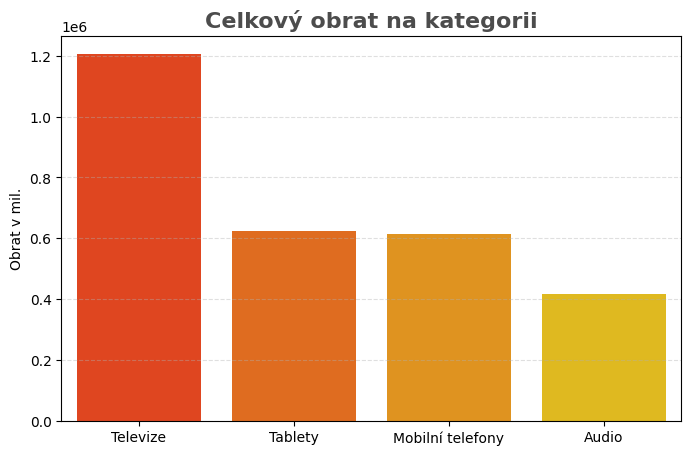

In [ ]:
plt.figure(figsize=(8,5))
sns.barplot(data=top_products , x='Category', y='sold', palette='autumn')

plt.xlabel('', alpha=0.4)
plt.ylabel('Obrat v mil.')
plt.title('Celkový obrat na kategorii', fontsize=16, fontweight='bold', alpha=0.7)
plt.xticks(ticks=range(0,4))
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.show()

Pojdme se podívat na vývoj transakcí bez ohledu na množství prodaného zboží nebo jeho cenu. Vytvořen novy sloupec Month-Year-22, kde si extrahujem pouze mesic pro groupby funkci.

In [ ]:
cross_masters_transactions['Month-Year-22'] = cross_masters_transactions['Date'].dt.month

In [ ]:
cross_masters_transactions

,Transaction ID,Date,Product name,Quantity,Month-Year,Month-Year-22
0,1,2022-02-01,Samsung QN55Q80T,1,2,2
1,1,2022-02-01,Apple iPhone 12 Pro,1,2,2
2,2,2022-02-02,Lenovo Tab P11 Pro,2,2,2
3,2,2022-02-02,Xiaomi Poco X3 Pro,1,2,2
4,3,2022-02-03,Bose QuietComfort Earbuds,2,2,2
...,...,...,...,...,...,...
136,77,2022-05-27,LG 75NANO81,1,5,5
137,77,2022-05-27,Samsung Galaxy Tab S7+,1,5,5
138,78,2022-05-29,Bose QuietComfort Earbuds,2,5,5
139,78,2022-05-29,Apple iPhone 12 Pro,1,5,5


Zde si připravíme data na použití pro vizualizaci dat v Seaborn. Novy DataFrame se jmenuje **monthly_trend**

In [ ]:
monthly_trend = cross_masters_transactions.groupby('Month-Year-22')['Transaction ID'].nunique().reset_index()
monthly_trend.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Month-Year-22   4 non-null      int32
 1   Transaction ID  4 non-null      int64
dtypes: int32(1), int64(1)
memory usage: 180.0 bytes


Získali DataFrame, kde lze vidět kolik transakci bylo v jakém měsíci.

In [ ]:
monthly_trend

,Month-Year-22,Transaction ID
0,2,28
1,3,26
2,4,14
3,5,10


Vizualizace v Seaborn a použijeme graf barplot. Z grafu lze vyčíst v jakém měsíci proběhlo nejvíc jednotlivých transakcí bez ohledu na počet prodaných kusů nebo jejich cenu.   


<ipython-input-60-da26aa3dfe3d>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=monthly_trend , x='Month-Year-22', y='Transaction ID', palette='autumn')


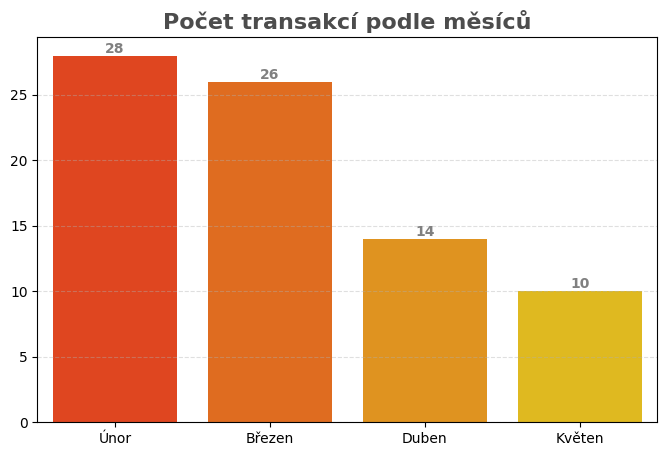

In [ ]:
plt.figure(figsize=(8,5))
ax = sns.barplot(data=monthly_trend , x='Month-Year-22', y='Transaction ID', palette='autumn')
# označení číslic nad sloupci je výpomoc pres ChatGPT
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=10, color='grey', fontweight='bold')
plt.xlabel('', alpha=0.4)
plt.ylabel('')
plt.title('Počet transakcí podle měsíců', fontsize=16, fontweight='bold', alpha=0.7)
plt.xticks(ticks=range(0,4), labels=['Únor', 'Březen', 'Duben', 'Květen'])
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.show()

###2.
### Který den v týdnu je `nejsilnější` na počet objednávek?


In [4]:
cross_masters_transactions['Day-Year-22'] = cross_masters_transactions['Date'].dt.day_name()

Vytvořili jsme si nový sloupec 'Day-Year-22' kde jsou vidět dny pro jednotlivou transakci.

In [29]:
cross_masters_transactions

,Transaction ID,Date,Product name,Quantity,Day-Year-22
0,1,2022-02-01,Samsung QN55Q80T,1,Tuesday
1,1,2022-02-01,Apple iPhone 12 Pro,1,Tuesday
2,2,2022-02-02,Lenovo Tab P11 Pro,2,Wednesday
3,2,2022-02-02,Xiaomi Poco X3 Pro,1,Wednesday
4,3,2022-02-03,Bose QuietComfort Earbuds,2,Thursday
...,...,...,...,...,...
136,77,2022-05-27,LG 75NANO81,1,Friday
137,77,2022-05-27,Samsung Galaxy Tab S7+,1,Friday
138,78,2022-05-29,Bose QuietComfort Earbuds,2,Sunday
139,78,2022-05-29,Apple iPhone 12 Pro,1,Sunday


Spočítáme počet objednávek podle 'Transcation ID'. Důležite je získat pouze informace z tabulky, které potřebujeme vizualizovat. V tomto případě jsou Transaction ID odstraněny duplikáta a dny sloučeny dle Transaction ID a získáme tím jejich počet.

In [44]:
day_trend = cross_masters_transactions.drop_duplicates(subset=['Transaction ID'])

day_trend = day_trend.groupby('Day-Year-22').size().reset_index(name='Počet dnů').sort_values(by='Počet dnů', ascending=False)

In [45]:
day_trend

,Day-Year-22,Počet dnů
1,Monday,13
2,Saturday,13
0,Friday,12
6,Wednesday,11
3,Sunday,10
5,Tuesday,10
4,Thursday,9


Je potřeba pro lepší vizualizaci si serařid dny od Monday - Sunday.

In [49]:
order_of_days = pd.DataFrame({
    "Day_of_Week": ["Saturday", "Monday", "Wednesday", "Friday", "Tuesday", "Thursday", "Sunday"],
    "Transaction ID": [13, 13, 11, 12, 10, 9, 10]})

In [50]:
order_of_days

,Day_of_Week,Transaction ID
0,Saturday,13
1,Monday,13
2,Wednesday,11
3,Friday,12
4,Tuesday,10
5,Thursday,9
6,Sunday,10


Připravime si proměnou, kde budou seřazeny dny v pořadí od Monday - Sunday.


In [51]:
day_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]


Zde aplikujeme proměnou 'day_order' na seřazení dnů od Monday - Sunday.

In [52]:
order_of_days["Day_of_Week"] = pd.Categorical(order_of_days["Day_of_Week"], categories=day_order, ordered=True)

day_trend = order_of_days.sort_values("Day_of_Week")

Výstupní tabulka 'day_trend' která bude sloužit pro graf.

In [53]:
day_trend

,Day_of_Week,Transaction ID
1,Monday,13
4,Tuesday,10
2,Wednesday,11
5,Thursday,9
3,Friday,12
0,Saturday,13
6,Sunday,10


Finální Vizualizace v grafu barplot.



<ipython-input-54-a0205f6faddd>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=day_trend , x='Day_of_Week', y='Transaction ID', palette='husl')


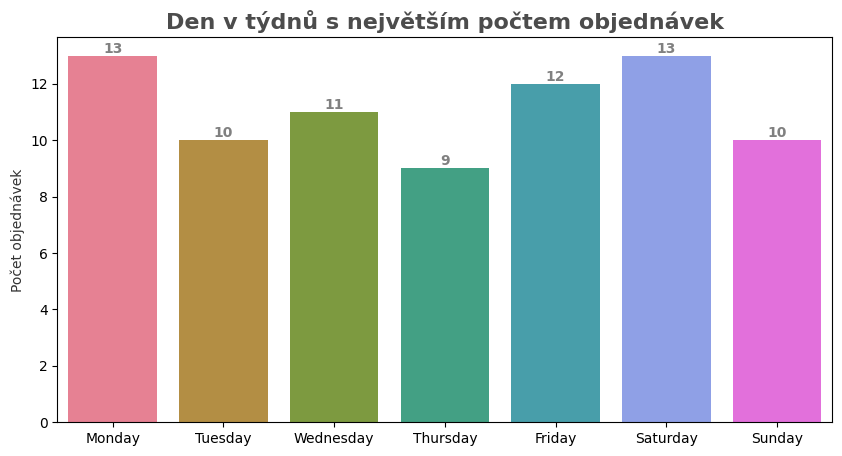

In [54]:
plt.figure(figsize=(10,5))
ax = sns.barplot(data=day_trend , x='Day_of_Week', y='Transaction ID', palette='husl')
# s čísly nad sloupci pomohl ChatGpt.
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=10, color='grey', fontweight='bold')
plt.xlabel('')
plt.ylabel('Počet objednávek', alpha=0.8)
plt.title('Den v týdnů s největším počtem objednávek', fontsize=16, fontweight='bold', alpha=0.7)
plt.xticks()

plt.show()

### 3.
###Která kategorie se `prodává nejčastěji` spolu s produkty `z kategorie Televize` (resp. jsou spolu v jedné objednávce)?

Vytahl jsem si nazvy televizi, ktere budu hledat.




In [ ]:
tv_products = cross_masters_products[cross_masters_products['Category'] == 'Televize']


,Product name
3,LG OLED55CX
4,Samsung QN55Q80T
5,LG 75NANO81


Zde jsem ziskal Transcation ID, ktere obsahuji nazev televize s tabulky Transactions.


In [ ]:
tv_products = cross_masters_transactions[cross_masters_transactions['Product name'].isin(['LG OLED55CX', 'Samsung QN55Q80T', 'LG 75NANO81'])]
tv_products.head()

,Transaction ID,Date,Product name,Quantity,Month-Year,Month-Year-22,Day-Year-22,Day_of_Week_CZ
0,1,2022-02-01,Samsung QN55Q80T,1,2,2,Tuesday,Úterý
6,5,2022-02-05,LG OLED55CX,1,2,2,Saturday,Sobota
10,8,2022-02-08,Samsung QN55Q80T,1,2,2,Tuesday,Úterý
11,9,2022-02-09,LG OLED55CX,1,2,2,Wednesday,Středa
17,13,2022-02-13,LG OLED55CX,1,2,2,Sunday,Neděle


Nalezl jsem unikatni Transaction ID, kde je součástí objednávky z kategorie TV i nákup jiného produktu.

In [ ]:
tv_transaction_ids = tv_products['Transaction ID'].unique()
tv_transaction_ids

array([ 1,  5,  8,  9, 13, 19, 21, 25, 31, 33, 37, 38, 42, 45, 46, 50, 51,
       53, 55, 58, 61, 62, 65, 68, 70, 72, 74, 76, 77, 78])

Produky a jejich počet, které byly zakoupeny společně s TV jsou v tabulce 'related_products'.

In [ ]:
related_products = cross_masters_transactions[cross_masters_transactions['Transaction ID'].isin(tv_transaction_ids)]


In [ ]:
related_products

,Product name,Quantity
0,Apple iPad Air,1
1,JBL Charge 4,3
2,Samsung Galaxy S21 Ultra,3
3,Xiaomi Poco X3 Pro,3
4,Sony WH-1000XM4,5
5,Apple iPhone 12 Pro,6
6,Samsung Galaxy Tab S7+,6
7,Bose QuietComfort Earbuds,7
8,LG 75NANO81,8
9,Samsung QN55Q80T,10


Tady jsem si chtel zmenšit tabulku, takže jsem dropnul sloupce co už potřebovat nebudu. Ve výsledku, je tento krok uplně navíc.

In [ ]:
related_products = related_products.drop(columns = ['Month-Year-22' , 'Day-Year-22', 'Day_of_Week_CZ'] )

In [ ]:
related_products

,Transaction ID,Date,Product name,Quantity,Month-Year
0,1,2022-02-01,Samsung QN55Q80T,1,2
1,1,2022-02-01,Apple iPhone 12 Pro,1,2
6,5,2022-02-05,LG OLED55CX,1,2
7,5,2022-02-05,Bose QuietComfort Earbuds,1,2
10,8,2022-02-08,Samsung QN55Q80T,1,2
...,...,...,...,...,...
136,77,2022-05-27,LG 75NANO81,1,5
137,77,2022-05-27,Samsung Galaxy Tab S7+,1,5
138,78,2022-05-29,Bose QuietComfort Earbuds,2,5
139,78,2022-05-29,Apple iPhone 12 Pro,1,5


Dostáváme se do části, kdo odeberem TV produkty aby nám nezkreslovali výsledky. Zároveň můžeme vidět jaké množstí a jakého produktu se prodalo současně s televizí.

In [ ]:
tv_products = ['LG 75NANO81', 'Samsung QN55Q80T', 'LG OLED55CX']
filtered_data = related_products[~related_products['Product name'].isin(tv_products)]
results_top = filtered_data.sort_values(by = 'Quantity', ascending = False)

In [ ]:
results_top

,Product name,Quantity
7,Bose QuietComfort Earbuds,7
5,Apple iPhone 12 Pro,6
6,Samsung Galaxy Tab S7+,6
4,Sony WH-1000XM4,5
1,JBL Charge 4,3
2,Samsung Galaxy S21 Ultra,3
3,Xiaomi Poco X3 Pro,3
0,Apple iPad Air,1


Bylo potřeba spojit DataFrame k získání kategorie a poté je grupnout přes Category a Quantity.

In [ ]:
merge_table = pd.merge( left = filtered_data, right = cross_masters_products, how = 'left',
                       on = ['Product name'])

merge_table = merge_table.groupby('Category')['Quantity'].sum().reset_index()

Finálni tabulka, kterou jsme získali. Následně si opět můžeme ukázat v grafu.

In [ ]:
merge_table

,Category,Quantity
0,Audio,15
1,Mobilní telefony,12
2,Tablety,7


<ipython-input-179-fdc723372c0d>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=merge_table , x='Category', y='Quantity', palette='colorblind')


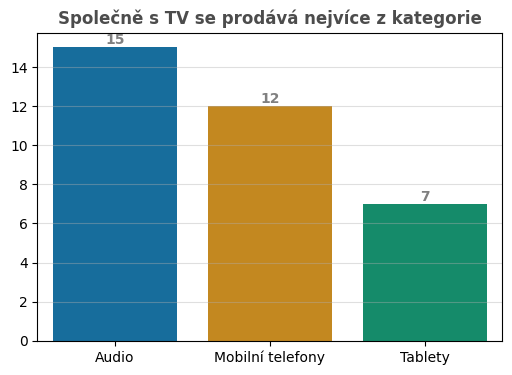

In [ ]:
plt.figure(figsize=(6,4))
ax = sns.barplot(data=merge_table , x='Category', y='Quantity', palette='colorblind')
# označení číslic nad sloupci je výpomoc pres ChatGPT
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=10, color='grey', fontweight='bold')
plt.xlabel('', alpha=0.4)
plt.ylabel('')
plt.title('Společně s TV se prodává nejvíce z kategorie', fontsize=12, fontweight='bold', alpha=0.7)
plt.grid(axis='y', linestyle='-', alpha=0.4)
plt.show()

##4.
###Od 18. 3. 2022 jsem klukům z marketingu navýšil budget na online marketingových platformách (Google Ads, Sklik, Facebook). Dokážeš mi říct, jestli to vedlo k `nějaké změně v prodeji?`

In [ ]:
cross_masters_transactions.head()

,Transaction ID,Date,Product name,Quantity
0,1,2022-02-01,Samsung QN55Q80T,1
1,1,2022-02-01,Apple iPhone 12 Pro,1
2,2,2022-02-02,Lenovo Tab P11 Pro,2
3,2,2022-02-02,Xiaomi Poco X3 Pro,1
4,3,2022-02-03,Bose QuietComfort Earbuds,2


Rozdělíme si data `DO` 18/3/2022 a získáme tím celkový součet predeje počtu kusů.

In [ ]:
before = cross_masters_transactions[cross_masters_transactions['Date'] < '2022-03-18']
total_before = before['Quantity'].sum()

Celkem bylo do 17.3.2022 prodáno 74 kusů produktů.

In [ ]:
total_before

74

Rozdělíme si data `PO` 18/3/2022 a získáme tím celkový součet predeje počtu kusů.

In [ ]:
after = cross_masters_transactions[cross_masters_transactions['Date'] >= '2022-03-18']
total_after = after['Quantity'].sum()

Celkem bylo prodáno od 18.3.2022 prodáno 89 kusů produktů.

In [ ]:
total_after

89

Pro tento výstup použiju koláčový graf, kdy mám názorně ukáže v procentech vývoj prodejů PŘED a PO 18/3/2022.

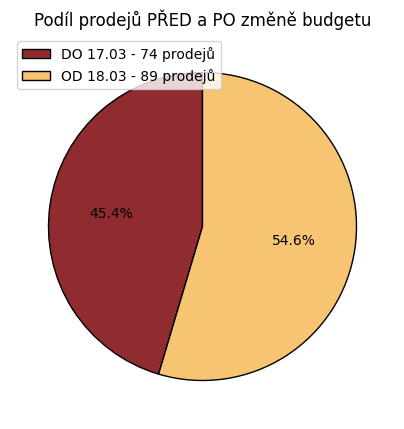

In [ ]:
plt.figure(figsize=(5,5))
plt.pie([total_before, total_after], colors=['#902C2F', '#F7C472'], autopct='%1.1f%%', startangle=90, wedgeprops={'edgecolor': 'black'})
plt.title('Podíl prodejů PŘED a PO změně budgetu')
plt.legend(labels=['DO 17.03 - 74 prodejů', 'OD 18.03 - 89 prodejů'],loc='upper left')
plt.show()

In [ ]:
print(f'Celkové prodeje před změnou: {total_before}')
print(f'Celkové prodeje po změně: {total_after}')

Celkové prodeje před změnou: 74
Celkové prodeje po změně: 89


Ukážeme si na grafu vývoj počtu transakcí, kdy spočítáme transakce v jednotlivé dny. Nahrajeme si opět tabulku, tentokrát pod názvem "Data_kategorie", kam byla přes funkci v excel přidán sloupec Category.

In [ ]:
cm_products = pd.read_excel('/Data_kategorie.xlsx', sheet_name = 'Products')
cm_transactions = pd.read_excel('/Data_kategorie.xlsx', sheet_name = 'Transactions')
cm_transactions.head()

,Transaction ID,Date,Product name,Quantity,Category
0,1,2022-02-01,Samsung QN55Q80T,1,Televize
1,1,2022-02-01,Apple iPhone 12 Pro,1,Mobilní telefony
2,2,2022-02-02,Lenovo Tab P11 Pro,2,Tablety
3,2,2022-02-02,Xiaomi Poco X3 Pro,1,Mobilní telefony
4,3,2022-02-03,Bose QuietComfort Earbuds,2,Audio


In [ ]:
cm_transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141 entries, 0 to 140
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Transaction ID  141 non-null    int64         
 1   Date            141 non-null    datetime64[ns]
 2   Product name    141 non-null    object        
 3   Quantity        141 non-null    int64         
 4   Category        141 non-null    object        
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 5.6+ KB


Je potřeba si sloučit všechny transakce které proběhly ve stejném dni. Vyšla nám tabulka, kterou můžeme použít pro graf.

In [ ]:
cm_transactions = cm_transactions.groupby('Date')['Transaction ID'].nunique().reset_index()
cm_transactions.sort_values(by='Transaction ID', ascending= False )

,Date,Transaction ID
54,2022-04-04,5
59,2022-04-29,3
60,2022-05-07,2
58,2022-04-23,2
51,2022-03-24,2
...,...,...
29,2022-03-02,1
30,2022-03-03,1
31,2022-03-04,1
32,2022-03-05,1


Zde si určíme datum, kdy došlo k navýšení budgetu a to 18/3/2022. To bude potřeba pro vertikalni osu v grafu.

In [ ]:
date_budget = pd.to_datetime('2022-03-18')

Celkový graf a všechny jeho proměnné. Které je potřeba jednotlivě si nadefinovat.

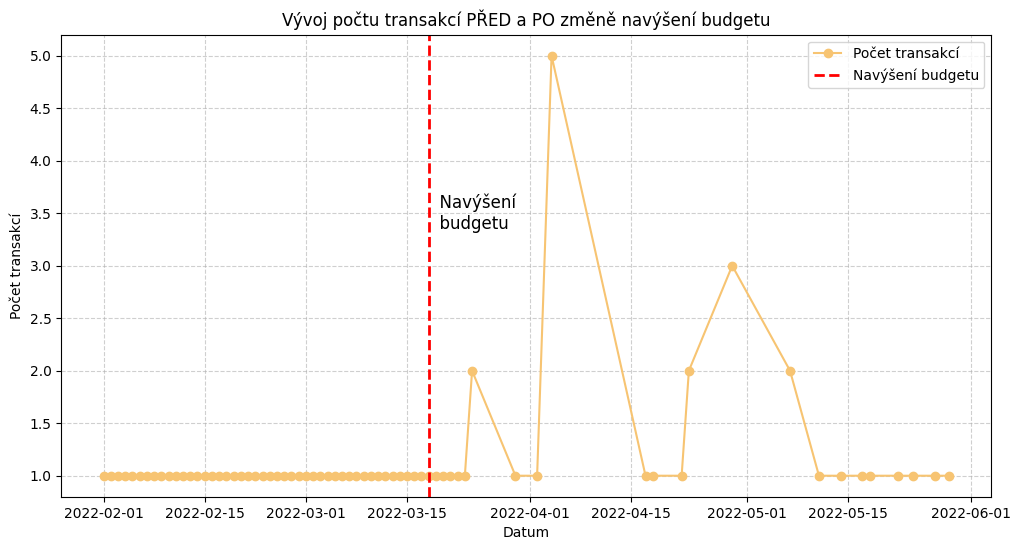

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(cm_transactions ["Date"],cm_transactions ["Transaction ID"], marker="o", linestyle="-", color="#F7C472", label="Počet transakcí")
plt.axvline(date_budget, color="red", linestyle="--", linewidth=2, label="Navýšení budgetu")

plt.xlabel("Datum", fontsize=10)
plt.ylabel("Počet transakcí", fontsize=10)
plt.title("Vývoj počtu transakcí před a po navýšení budgetu",  fontsize=16)
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)

plt.text(date_budget, cm_transactions["Transaction ID"].max()*0.7, "  Navýšení\n  budgetu", color="black", fontsize=12, verticalalignment="center")

plt.xlabel("Datum")
plt.ylabel("Počet transakcí")
plt.title("Vývoj počtu transakcí PŘED a PO změně navýšení budgetu")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)


plt.xticks(rotation=0)

plt.show()


 ## VÝSLEDEK - Na základě grafu lze vidět, že po navýšení marketingového rozpočtu dne 18. 3. 2022 (označeno červenou čárkovanou čárou) došlo ke krátkodobému nárůstu počtu transakcí.

## Klíčové pozorování:

*   Před navýšením rozpočtu: Počet transakcí byl konstantní na úrovni 1.
*   Po navýšení rozpočtu: Zhruba od konce března došlo k prudkému růstu transakcí s vrcholem přes 5 transakcí. Poté následovalo kolísání s několika menšími vrcholy v dubnu a květnu.
*   Dlouhodobý efekt: Po květnu se zdá, že počet transakcí se vrací zpět k původnímu nízkému stavu.

Interpretace:
## Navýšení rozpočtu mělo pozitivní dopad na počet transakcí, ale tento efekt byl pouze dočasný. Po počátečním růstu se transakce postupně snížily zpět na původní úroveň. To naznačuje, že zvýšený marketingový rozpočet mohl krátkodobě přilákat více zákazníků, ale bez dalších faktorů (např. optimalizace kampaní, udržení zákazníků) se dlouhodobý efekt neudržel.